In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn.metrics import *
from sklearn.pipeline import *
from sklearn.compose import *
from sklearn.impute import *
from sklearn.ensemble import *
from sklearn.tree import *
from sklearn.svm import *
from sklearn.neighbors import *
from sklearn.naive_bayes import *
from sklearn.decomposition import *
from sklearn.feature_selection import *
from sklearn.model_selection import *
from sklearn.neural_network import *
from sklearn.dummy import *
from xgboost import *
import xgboost as xgb


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv


In [2]:
data=pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')
test=pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  total_amount           175000 non-nu

In [4]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0


In [5]:
data.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          6077
trip_distance               0
RatecodeID               6077
store_and_fwd_flag       6077
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     6077
Airport_fee              6077
dtype: int64

In [6]:
test.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          1779
trip_distance               0
RatecodeID               1779
store_and_fwd_flag       1779
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
congestion_surcharge     1779
Airport_fee              1779
dtype: int64

<Axes: xlabel='passenger_count', ylabel='total_amount'>

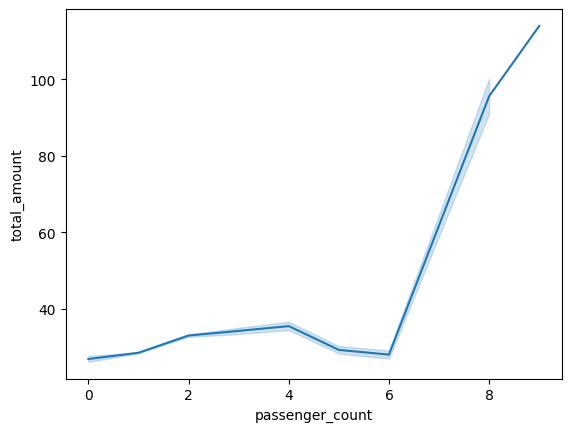

In [7]:
sns.lineplot(data=data,x='passenger_count',y='total_amount')

Total amount increases with increase in number of passengers but decreases after 5 and drastically increases after 6.
It says either the values are outliers or it falls under a different category/fare after 6 passengers

<Axes: xlabel='trip_distance', ylabel='total_amount'>

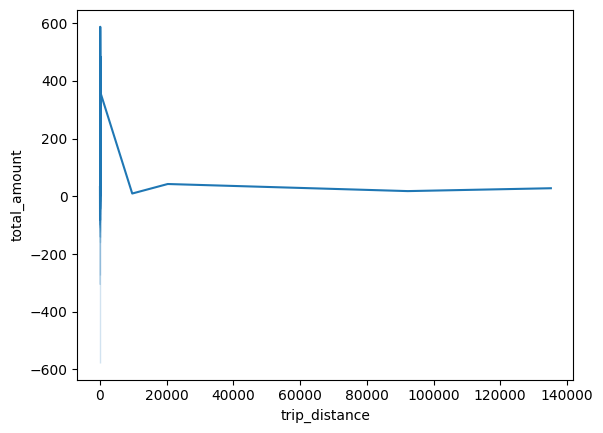

In [8]:
sns.lineplot(data=data,x='trip_distance',y='total_amount')

Total amount seem to be reducing with increase in trip distance. The extremely high values of trip distance seem to be outliers.

<Axes: xlabel='store_and_fwd_flag', ylabel='total_amount'>

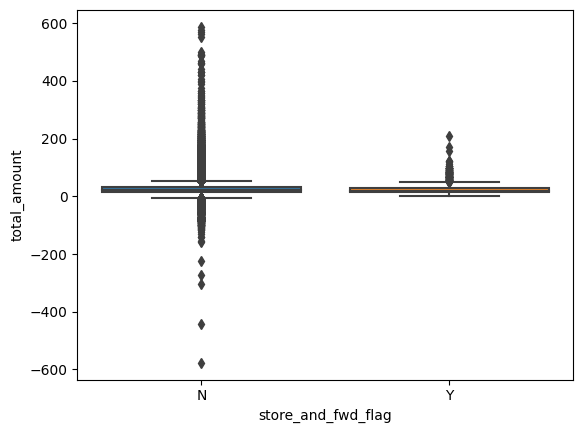

In [9]:
sns.boxplot(data=data,x='store_and_fwd_flag',y='total_amount')

<Axes: xlabel='trip_distance', ylabel='RatecodeID'>

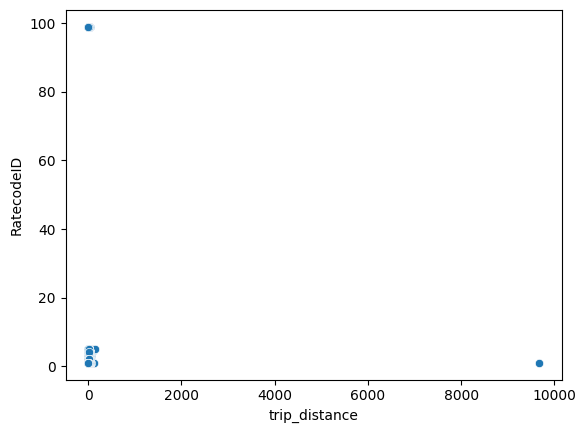

In [10]:
sns.scatterplot(data=data,x='trip_distance',y='RatecodeID')

Rate code ID doesnt seem to have any relation with trip distance

<Axes: xlabel='RatecodeID', ylabel='total_amount'>

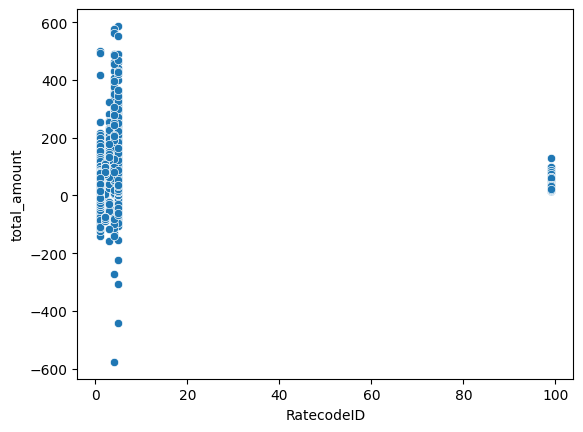

In [11]:
sns.scatterplot(data=data,x='RatecodeID',y='total_amount')

<Axes: xlabel='trip_distance', ylabel='total_amount'>

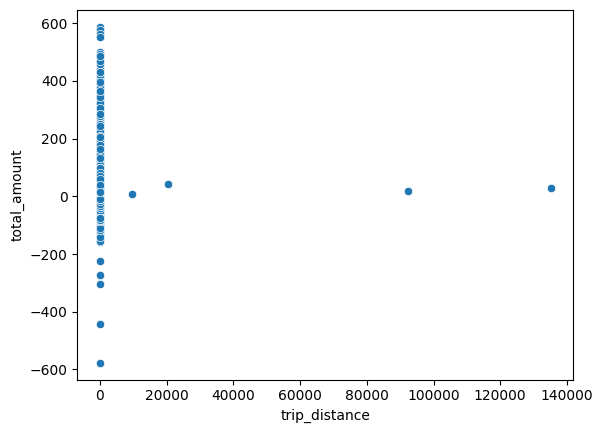

In [12]:
sns.scatterplot(data=data,x='trip_distance',y='total_amount')

<Axes: xlabel='RatecodeID', ylabel='passenger_count'>

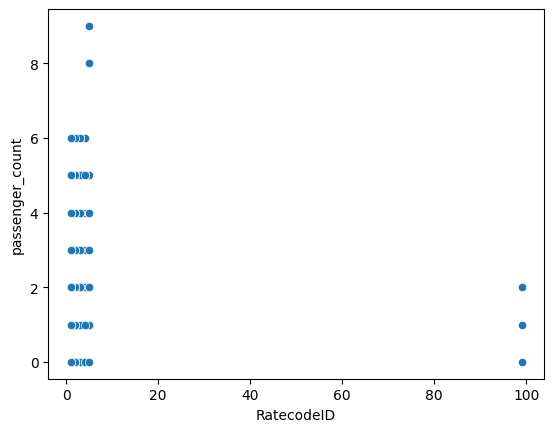

In [13]:
sns.scatterplot(data=data,x='RatecodeID',y='passenger_count')

<Axes: xlabel='RatecodeID', ylabel='congestion_surcharge'>

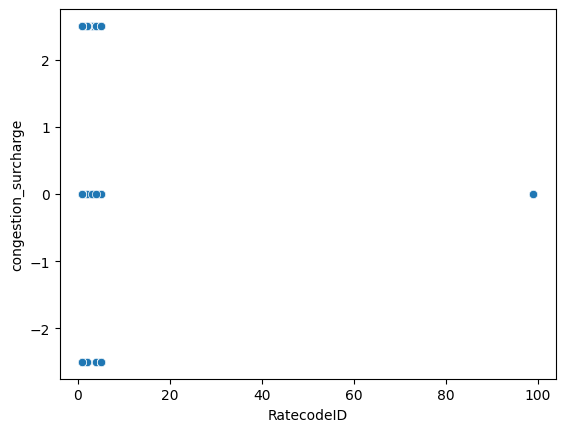

In [14]:
sns.scatterplot(data=data,x='RatecodeID',y='congestion_surcharge')

<Axes: xlabel='trip_distance', ylabel='total_amount'>

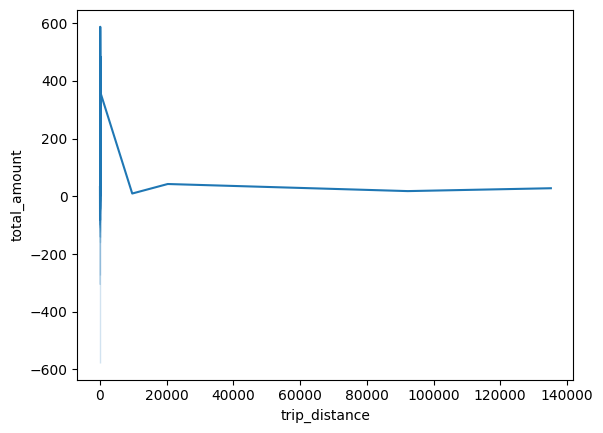

In [15]:
sns.lineplot(data=data,x='trip_distance',y='total_amount')

<Axes: xlabel='total_amount', ylabel='tip_amount'>

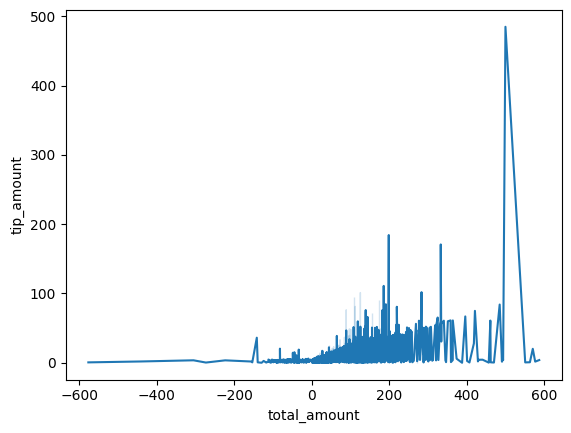

In [16]:
sns.lineplot(data=data,x='total_amount',y='tip_amount')

In [17]:
# sns.pairplot(data)

IMPUTING MISSING VALUES

In [18]:
# def impute(data):
#     for a in data.isnull():
#         if data[a].isnull().sum()>0:
#             data[a].fillna(data[a].mode()[0],inplace=True)

In [19]:
# impute(data)
# impute(test)

In [20]:
si=SimpleImputer(strategy='most_frequent',missing_values=np.nan)
data=pd.DataFrame(si.fit_transform(data),columns=data.columns).astype(data.dtypes.to_dict())
test=pd.DataFrame(si.fit_transform(test),columns=test.columns).astype(test.dtypes.to_dict())

In [21]:
data.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type              object
extra                    float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
Airport_fee              float64
dtype: object

In [22]:
test.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
extra                    0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
congestion_surcharge     0
Airport_fee              0
dtype: int64

PREPROCESSING

In [23]:
def total_seconds(data):
    l=[]
    for i in range(len(data)):
        time1 = data['tpep_dropoff_datetime'][i]
        time2 = data['tpep_pickup_datetime'][i]
        dt = np.datetime64(time1) - np.datetime64(time2)
        d_num=int(str(dt).strip(' seconds'))
#         print(abs(d_num))
        l.append(abs(d_num))
    data['trip_duration']=l

Since many of the values for the drop off time was before pick up time the trip duration was in negatives. Hence absolute value was considered as negative time doesnt make sense.

In [24]:
total_seconds(data)
total_seconds(test)

In [25]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,trip_duration
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0,2736
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0,3806
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0,3219
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0,3412
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0,1130


In [26]:
X1=data.drop(['total_amount','tpep_dropoff_datetime','tpep_pickup_datetime'],axis=1)
y1=data['total_amount']
test.drop(['tpep_pickup_datetime','tpep_dropoff_datetime'],axis=1,inplace=True)

In [27]:
le=LabelEncoder()

In [28]:
X1['payment_type']=le.fit_transform(X1['payment_type'])
X1['store_and_fwd_flag']=le.fit_transform(X1['store_and_fwd_flag'])

In [29]:
test['payment_type']=le.fit_transform(test['payment_type'])
test['store_and_fwd_flag']=le.fit_transform(test['store_and_fwd_flag'])

MODEL TRAINING

In [30]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.2,random_state=42)

In [31]:
X1_train.shape

(140000, 15)

In [32]:
X1_test.shape

(35000, 15)

In [33]:
y1_train.shape

(140000,)

In [34]:
y1_test.shape

(35000,)

In [35]:
dummy_mean=DummyRegressor(strategy='mean')
dummy_mean.fit(X1_train,y1_train)
dummy_mean.score(X1_test,y1_test)

-3.7584352301278656e-05

In [36]:
dummy_median=DummyRegressor(strategy='median')
dummy_median.fit(X1_train,y1_train)
dummy_median.score(X1_test,y1_test)

-0.09979753509607359

In [37]:
lr=LinearRegression()

In [38]:
lr.fit(X1_train,y1_train)
lr.score(X1_test,y1_test)

0.7167157568480076

In [39]:
# poly = PolynomialFeatures(degree=2, interaction_only=False, order='C')
# X_poly_train = poly.fit_transform(X1_train)
# lin2 = LinearRegression()
# lin2.fit(X_poly_train, y1_train)
# X_poly_test = poly.fit_transform(X1_test)
# y1_pred = lin2.predict(X_poly_test)
# r2_score(y1_test, y1_pred)


In [40]:
pipe=Pipeline([('scaler',StandardScaler()),('sgd',SGDRegressor(random_state=42))])

In [41]:
pipe.fit(X1_train,y1_train)
pipe.score(X1_test,y1_test)

-694756533961005.6

In [42]:
# sgd_params={'alpha':[0.0001,0.01,1],'penalty':['l1','l2'],'loss':['squared_loss','huber'],'learning_rate':['constant','optimal'],'eta0':[0.0001,0.01,1],'n_iter_no_change':[5,10],'random_state':[42]}

# sgdcv= GridSearchCV(sgd,sgd_params,cv=5)
# sgdcv.fit(X_train_norm,y1_train)
# sgdcv.predict(X_test_norm)
# sgdcv.score(X_test_norm,y1_test)

In [43]:
# pipe2=Pipeline([('scaler',StandardScaler()),('svr',SVR())])
# pipe2.fit(X1_train,y1_train)
# pipe2.score(X1_test,y1_test)

In [44]:
# knr=KNeighborsRegressor()
# knr.fit(X1_train,y1_train)
# knr.score(X1_test,y1_test)

In [45]:
dt=DecisionTreeRegressor(random_state=42)
dt.fit(X1_train,y1_train)
dt.score(X1_test,y1_test)

0.894579685405656

In [46]:
rf=RandomForestRegressor(random_state=42)
rf.fit(X1_train,y1_train)
rf.score(X1_test,y1_test)

0.9556743132157149

In [47]:
# rf.fit(X1,y1)
# output=rf.predict(test)

In [48]:
# rf1=RandomForestRegressor(random_state=42)
# rf1.fit(X1,y1)

In [49]:
rf_params=rf_params={'n_estimators':[10,100],'max_depth':[1,10,100],'min_samples_split':[2,6,10],'min_samples_leaf':[1,5,10]}
rfcv=GridSearchCV(rf,rf_params,cv=4,verbose=2)
rfcv.fit(X1_train,y1_train)
rfcv.score(X1_test,y1_test)

Fitting 4 folds for each of 54 candidates, totalling 216 fits
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.5s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.5s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.5s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.5s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.7s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.8s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.7s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.7s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.5s
[CV] END max_depth=1, min_samples_leaf=1, m

0.9570854340513932

In [50]:
rfcv.best_params_

{'max_depth': 100,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [51]:
rfcv.best_estimator_.fit(X1,y1)
output=rfcv.predict(test)

In [52]:
gbr=GradientBoostingRegressor(random_state=42)
gbr.fit(X1_train,y1_train)
gbr.score(X1_test,y1_test)

0.9436438050149417

In [53]:
# gbr.fit(X1,y1)
# output=gbr.predict(test)

In [54]:
gbre=BaggingRegressor(random_state=42)
gbre.fit(X1_train,y1_train)
gbre.score(X1_test,y1_test)


0.94709464951942

In [55]:
gbre.fit(X1,y1)
output=gbre.predict(test)

In [56]:
xgb=XGBRegressor(random_state=42)
xgb.fit(X1_train,y1_train)
xgb.score(X1_test,y1_test)

0.9560502259709515

In [57]:
# xgb.fit(X1,y1)

In [58]:
# output=xgb.predict(test)

In [59]:
# xgb_params={'n_estimators':[10,100,1000],'max_depth':[1,5,10],'learning_rate':[0.01,0.1,1]}
# xgcv= GridSearchCV(xgb,xgb_params,cv=5)
# xgcv.fit(X1_train,y1_train)
# xgcv.score(X1_test,y1_test)

In [60]:
# xgb_params={'n_estimators':[1000],'max_depth':[5],'learning_rate':[0.01]}
# xgcv= GridSearchCV(xgb,xgb_params,cv=5)
# # xgcv.fit(X1_train,y1_train)
# # xgcv.score(X1_test,y1_test)

In [61]:
# xgcv.best_params_
# xgcv.best_params_.fit(X1,y1)
# xgcv.best_estimator_.predict(test)

In [62]:
# xgcv.fit(X1,y1)

In [63]:
# output=xgcv.predict(test)

In [64]:
mlp=MLPRegressor(random_state=42)
mlp.fit(X1_train,y1_train)
mlp.score(X1_test,y1_test)

0.844413010321428

In [65]:
# mlp_params={'activation':['relu','tanh','logistic'],'solver':['adam','sgd'],'learning_rate':['constant','adaptive']}
# mlpcv=GridSearchCV(mlp,mlp_params,cv=5)
# mlpcv.fit(X1_train,y1_train)
# mlpcv.score(X1_test,y1_test)

In [66]:
# mlpcv.fit(X1,y1)
# output=mlpcv.predict(test)

In [67]:
output = pd.DataFrame({'ID': np.arange(1,50001), 'total_amount': output})

In [68]:
output.to_csv("submission.csv", index=False)